## Escalamiento hacia frecuencias bajas
Versión 01 - marzo 202

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import lasio , os
#from scipy.fftpack import fft, ifft
import seaborn as sns 

def valtonan(inp, val=-9999.00):
    """Convert all 'val' to NaN's."""
    inp[inp==val] = np.nan
    return inp

Carga de registros geofísico reconstruido y original

In [2]:
lrec = lasio.read(os.path.join("registros.las")) 
df_rec = lrec.df()
df_rec.describe()

,DTCO,DTSM,GR,RHOB,RP,VP,VS
count,31474.000000,31472.000000,31495.000000,31474.000000,31494.000000,31474.00000,31472.000000
mean,109.837481,270.689073,36.379971,2.447632,25.593827,2977.64874,1316.754813
std,24.602015,95.525178,9.455289,0.152393,120.931890,949.06782,617.830009
min,47.688770,91.376950,9.713840,1.966400,0.162800,1718.47200,417.099200
25%,99.710345,222.629325,32.128035,2.330783,0.853301,2409.37000,951.952325
50%,113.125350,268.518700,35.351910,2.453500,1.120305,2694.35650,1135.116000
75%,126.506075,320.184125,39.129825,2.562878,1.845486,3056.85425,1369.091750
max,177.366900,730.761400,162.815600,2.828980,1949.893000,6391.44100,3335.634000


In [3]:
type(df_rec['DTCO'])

pandas.core.series.Series

In [4]:
datos_sis = pd.read_csv('datos_sismicos.csv')

In [5]:
datos_sis.keys()

Index(['depth', 'imp_inver', 'amplitud', 'vpsdm'], dtype='object')

In [6]:
datos_sis.describe()

,depth,imp_inver,amplitud,vpsdm
count,31966.000000,31966.000000,31966.000000,31966.000000
mean,2435.733029,6181.456153,84.152520,2721.737712
std,1406.337112,3297.462823,4781.855006,1015.971393
min,0.000000,-9999.000000,-15743.600000,-9999.000000
25%,1217.866500,5363.495000,-2840.415000,2248.340000
50%,2435.733000,6146.250000,63.260000,2415.450000
75%,3653.599625,7539.077500,3018.725000,2877.150000
max,4871.465800,14513.720000,14768.170000,5023.480000


In [7]:
zvpsdm = datos_sis['depth'].values
vpsdm = datos_sis['vpsdm'].values 

In [8]:
vpsdm = valtonan(vpsdm)

Carga de cimas geológicas

In [9]:
tops = {}

with open('cimas.txt') as f:
    for line in f.readlines():
        if not line.startswith('#'):
            temp = line.strip().split('\t')
            tops[temp[-1].replace('_',' ')] = float(temp[1])
            
tops

{'Cima B': 1275.0, 'Cima C': 2132.0, 'Cima D': 2973.0}

In [10]:
tops.items() , tops.values()

(dict_items([('Cima B', 1275.0), ('Cima C', 2132.0), ('Cima D', 2973.0)]),
 dict_values([1275.0, 2132.0, 2973.0]))

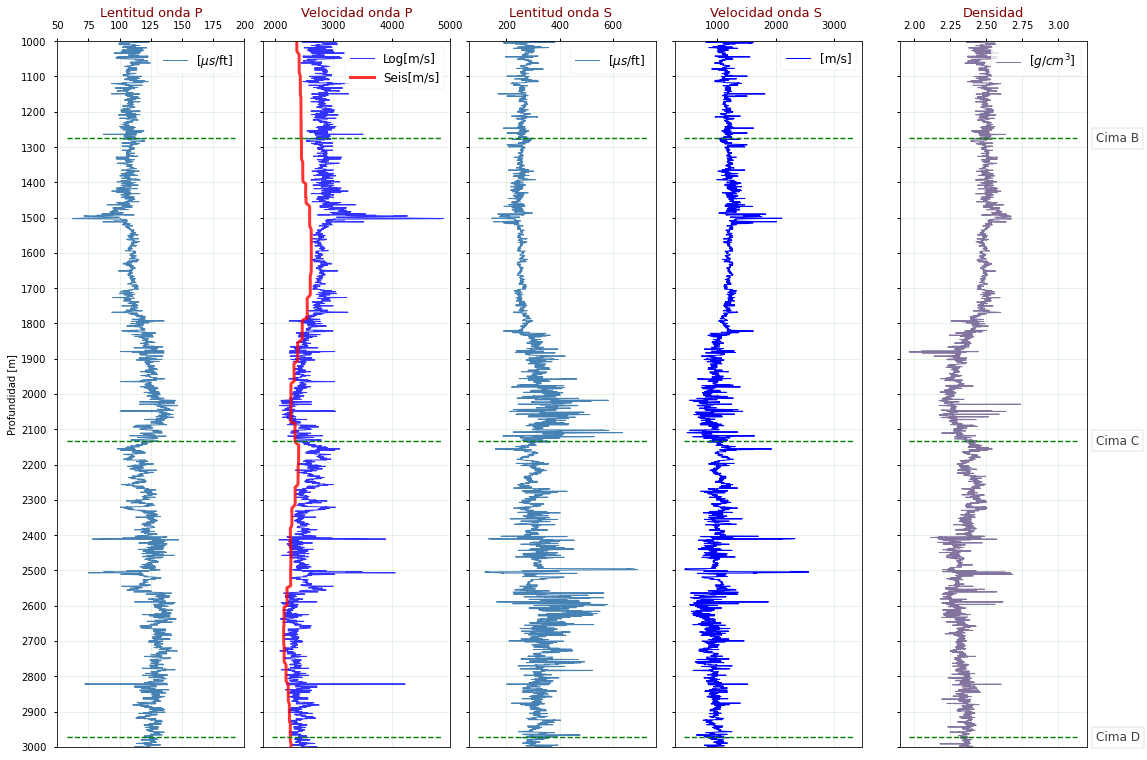

In [11]:
################################
f1 = plt.figure(figsize = [13,14])
plt.style.use('seaborn-notebook')
################################
#Lentitudes
curv1 = f1.add_axes([0, 0, 0.2,0.7]) #Define la posición del carril [pos-x, pos-y, ancho-x, altura-y]
curv1.plot(df_rec.DTCO, df_rec.index,'steelblue', alpha=1, lw=1, label='[$\mu s /  $ft]')
curv1.set_ylabel('Profundidad ' + '[m]', fontsize = '10' )
curv1.set_xlabel('Lentitud onda P', fontsize = '13', color = 'maroon')
curv1.set_ylim(1000, 3000)
curv1.set_xlim(50,200)
curv1.set_yticks(np.linspace (1000,3000,21) )
curv1.legend(loc='upper right', fontsize='large',shadow=False)
curv1.xaxis.tick_top()
curv1.xaxis.set_label_position('top')
curv1.invert_yaxis()
curv1.grid(True, c="g", alpha=0.1)

curv2 = f1.add_axes([0.22, 0, 0.2,0.7]) #Define la posición del carril [pos-x, pos-y, ancho-x, altura-y]
curv2.plot(df_rec.VP, df_rec.index,'b', alpha=0.8, lw=1, label='Log[m/s]')
curv2.plot(vpsdm, zvpsdm,'r', alpha=0.8, lw=3, label='Seis[m/s]')
curv2.set_xlabel('Velocidad onda P', fontsize = '13', color = 'maroon')
curv2.set_ylim(1000, 3000)
curv2.set_xlim(1800,5000)
curv2.set_yticks(np.linspace (1000,3000,21) )
curv2.legend(loc='upper right', fontsize='large',shadow=False)
curv2.xaxis.tick_top()
curv2.xaxis.set_label_position('top')
curv2.invert_yaxis()
curv2.set_yticklabels('')
curv2.grid(True, c="g", alpha=0.1)

curv3 = f1.add_axes([0.44, 0, 0.2,0.7]) #Define la posición del carril [pos-x, pos-y, ancho-x, altura-y]
curv3.plot(df_rec.DTSM, df_rec.index,'steelblue', alpha=1, lw=1, label='[$\mu s /  $ft]')
curv3.set_xlabel('Lentitud onda S ', fontsize = '13', color = 'maroon')
curv3.set_ylim(1000, 3000)
curv3.set_xlim()
curv3.set_yticks(np.linspace (1000,3000,21) )
curv3.legend(loc='upper right', fontsize='large',shadow=False)
curv3.xaxis.tick_top()
curv3.xaxis.set_label_position('top')
curv3.invert_yaxis()
curv3.set_yticklabels('')
curv3.grid(True, c="g", alpha=0.1)

curv4 = f1.add_axes([0.66, 0, 0.2,0.7]) #Define la posición del carril [pos-x, pos-y, ancho-x, altura-y]
curv4.plot(df_rec.VS, df_rec.index,'b', alpha=1, lw=1, label='[m/s]')
curv4.set_xlabel('Velocidad onda S ', fontsize = '13', color = 'maroon')
curv4.set_ylim(1000, 3000)
curv4.set_xlim()
curv4.set_yticks(np.linspace (1000,3000,21) )
curv4.legend(loc='upper right', fontsize='large',shadow=False)
curv4.xaxis.tick_top()
curv4.xaxis.set_label_position('top')
curv4.invert_yaxis()
curv4.set_yticklabels('')
curv4.grid(True, c="g", alpha=0.1)

#Densidad volumétrica
curv5 = f1.add_axes([0.9, 0, 0.2,0.7]) #Define la posición del carril [pos-x, pos-y, ancho-x, altura-y]
curv5.plot(df_rec.RHOB, df_rec.index,'#645188', alpha=0.8, lw=1, label='[$g/cm^3$]')
curv5.set_xlabel('Densidad', fontsize = '13', color = 'maroon')
curv5.set_ylim(1000, 3000)
curv5.set_xlim(1.9,3.2)
curv5.set_yticks(np.linspace (1000,3000,21) )
curv5.legend(loc='upper right', fontsize='large',shadow=False)
curv5.xaxis.tick_top()
curv5.xaxis.set_label_position('top')
curv5.set_yticklabels('')
curv5.invert_yaxis()
curv5.grid(True, c="g", alpha=0.1)


cimas = f1.add_axes([0.93, 0, 0.2,0.7])
cimas.set_ylim(3000,1000)
cimas.set_axis_off()

for i in range (5):
    for top in tops.values() :
        f1.axes[i].axhline( y = float(top), color = 'g', lw = 1.4, ls = '--',  
                            alpha = 1, xmin = 0.05, xmax = 0.95 )

for top, depth in tops.items():
    cimas.text(x = 0.9, y = float(depth), s = top,
                         alpha=0.75, color='k',
                         fontsize = '12',
                         horizontalalignment = 'left',
                         verticalalignment = 'center',
                         bbox=dict(facecolor='w', alpha=0.5, lw = 0.2),
                         weight = 'light')

plt.show()


### Convertir el tipo de datos _pandas.core.serie.Serie_ a _numpy.ndarray_
Es necesario convertir los datos a numpy ya que al hacer el cálculo de la serie de reflectividad no es posible modificar el tamaño de los vectores columnas si se manipulan los datos en el formato Pandas.

In [12]:
dtco_rec = df_rec.DTCO.values
md_rec = df_rec.index.values
vp_rec = df_rec.VP
vs_rec = df_rec.VS
den_rec = df_rec["RHOB"].values

In [13]:
type(dtco_rec)

numpy.ndarray

## Método de Backus

In [14]:
#Promedio móvil a través de la función de convolución
def moving_avg_conv(a, length):
    boxcar = np.ones(length)/length
    return np.convolve(a, boxcar, mode="same")

In [15]:
#Promedio de Backus
lonb=23 #Longitud de Backus a partir de análisis del contenido de frecuencia de los datos sísmicos
dz=np.mean(np.diff(md_rec))#Intervalo de muestreo de la archivo LAS
print("Muetreo = {:.4f}".format(dz));

Muetreo = 0.1524


In [16]:
lb=np.floor(lonb/dz) #Longitud de la ventana móvil

In [17]:
lb=int(float(lb)) # Longitud de Backus (final)

In [18]:
pwm=((den_rec)*np.power(vp_rec,2.0)) #P wave modulus

In [19]:
#Constantes de Poisson
lam = (den_rec*(np.power(vp_rec,2.0)-2*np.power(vs_rec,2.0)))
mu= (den_rec*np.power(vs_rec,2.0))

In [20]:
type(pwm)

pandas.core.series.Series

In [21]:
#Constantes de rigidez
A1 = 4.0 * moving_avg_conv(mu*(lam+mu)/pwm,lb)
A = A1 + np.power(moving_avg_conv(lam/pwm, lb), 2.0) / moving_avg_conv(1.0/pwm,144)
C = 1.0 / moving_avg_conv(1.0/pwm,lb)
F = moving_avg_conv(lam/pwm,lb) / moving_avg_conv(1.0/pwm,144)
L = 1.0 / moving_avg_conv(1.0/mu,lb)
M = moving_avg_conv(mu,lb)

In [22]:
#Constantes elásticas escaladas hacia frecuencias bajas
denbac=moving_avg_conv(den_rec,lb)
vpbac = np.sqrt(C/denbac)
vsbac = np.sqrt(L/denbac)

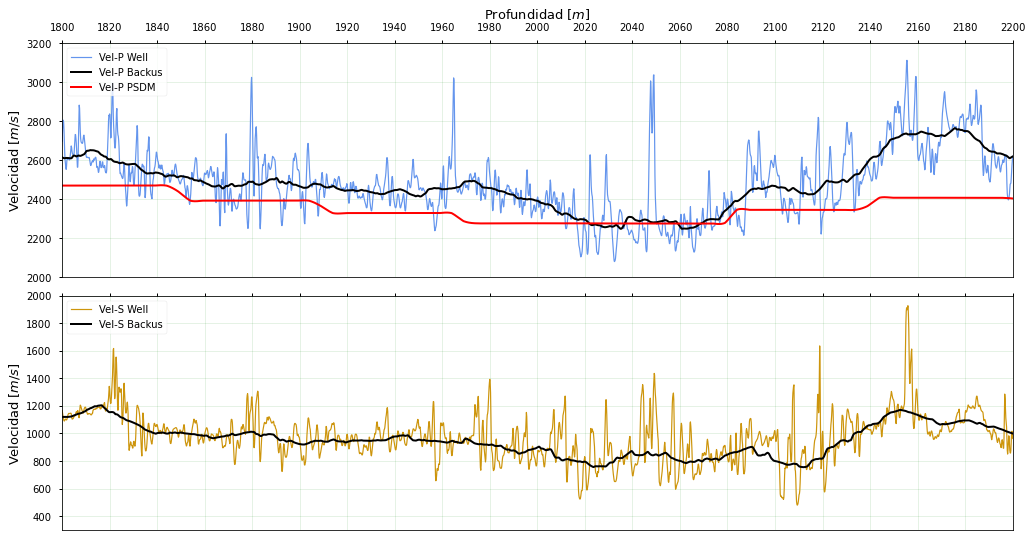

In [23]:
################################
f1 = plt.figure(figsize = [12,13])
plt.style.use('seaborn-notebook')

################################

curv1 = f1.add_axes([0, 0, 1.1, 0.25]) #Define la posición del carril [pos-x, pos-y, ancho-x, altura-y]
curv1.plot(md_rec, vp_rec,'#6495ed', alpha=1, lw=1.2, label='Vel-P Well')
curv1.plot(md_rec, vpbac,'k', alpha=1, lw=2, label='Vel-P Backus')
curv1.plot(zvpsdm, vpsdm, 'r', lw=2, label='Vel-P PSDM')
curv1.set_xlabel('Profundidad ' + '[$m$]', fontsize = '13' )
curv1.set_ylabel('Velocidad '+ '[$m/s$]', fontsize = '13' )
curv1.set_xlim(1800, 2200)
curv1.set_ylim(2000, 3200)
curv1.xaxis.tick_top()
curv1.set_xticks(np.linspace(1800,2200, 21))
curv1.xaxis.set_label_position('top')
curv1.legend(loc='upper left', fontsize='medium',shadow=False)
#curv1.invert_yaxis()
curv1.grid(True, c="g", alpha=0.1)

curv2 = f1.add_axes([0, -0.27, 1.1, 0.25]) #Define la posición del carril [pos-x, pos-y, ancho-x, altura-y]
curv2.plot(md_rec, vs_rec, '#cd950c',lw=1.2, label='Vel-S Well')
curv2.plot(md_rec, vsbac, 'k',lw=2, label='Vel-S Backus')
curv2.set_ylabel('Velocidad '+ '[$m/s$]', fontsize = '13' )
curv2.set_xlim(1800, 2200)
curv2.set_ylim(300, 2000)
curv2.set_xticklabels('')
curv2.xaxis.tick_top()
curv2.set_xticks(np.linspace(1800, 2200, 21))
curv2.xaxis.set_label_position('top')
curv2.legend(loc='upper left', fontsize='medium',shadow=False)
#curv1.invert_yaxis()
curv2.grid(True, c="g", alpha=0.1)


plt.show()

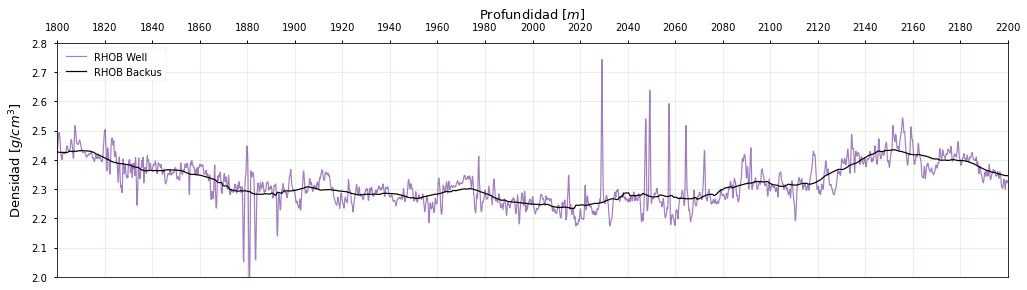

In [24]:
################################
f1 = plt.figure(figsize = [12,13])
plt.style.use('seaborn-notebook')

################################
################################


curv1 = f1.add_axes([0, 0, 1.1, 0.25]) #Define la posición del carril [pos-x, pos-y, ancho-x, altura-y]
curv1.plot(md_rec, den_rec,'#4b0082', alpha=0.5, lw=1.2, label='RHOB Well')
curv1.plot(md_rec, denbac, 'k', alpha=1, lw=1.2, label='RHOB Backus')

curv1.set_xlabel('Profundidad ' + '[$m$]', fontsize = '13' )
curv1.set_ylabel('Densidad '+ '[$g/cm^3$]', fontsize = '13' )
curv1.set_xlim(1800, 2200)
curv1.set_ylim(2.0,2.8)
curv1.xaxis.tick_top()
curv1.set_xticks(np.linspace(1800, 2200, 21))
curv1.xaxis.set_label_position('top')
curv1.legend(loc='upper left', fontsize='medium',shadow=False)
#curv1.invert_yaxis()
curv1.grid(True, c="g", alpha=0.1)


plt.show()

In [25]:
#Exportar datos en formato CSV 
#np.savetxt("upscaling.csv", np.column_stack((md_rec,vp_rec,vpbac,vs_rec,vsbac,den_rec,denbac)), delimiter=",", fmt='%s')